In [1]:
from google.colab import files
ukloaded = files.upload()

Saving lap1.csv to lap1.csv


In [2]:
uploaded = files.upload()

Saving lap2.csv to lap2.csv


In [3]:
from tensorflow import keras
from keras import layers
import io
import time
from keras.layers import GRU
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
data1 = pd.read_csv(io.BytesIO(ukloaded['lap1.csv']))
data2=pd.read_csv(io.BytesIO(uploaded['lap2.csv']))

In [4]:
v2vd=pd.concat([data1,data2],ignore_index=True)
nn=pd.DataFrame(v2vd.loc[13000:31000,[' Sender Speed(km/h)']])
from keras import metrics
m = keras.metrics.RootMeanSquaredError()
metrics1=[metrics.mae,metrics.mse,m]
metrics=metrics1
selected_features = [' Sender Speed(km/h)']

In [9]:
#Adam
dataset = nn[selected_features].values
# Scale the dataset between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
# Split the data into training and testing sets
train_size = int(len(dataset) * 0.8)
train_data1 = dataset[:train_size]
test_data1 = dataset[train_size:]
train_data = scaler.fit_transform(train_data1)
test_data = scaler.transform(test_data1)

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 15 # Length of input sequence
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
Adam=keras.optimizers.Adam()
# Build the GRU mode

# Compile and train the model

model = Sequential()
model.add(GRU(50, activation='relu', return_sequences=True,  input_shape=(seq_length, len(selected_features))))
model.add(GRU(units=50))
model.add(Dense(1))
model.compile(optimizer=Adam, loss=['mean_squared_error'],metrics=metrics1)
start = time.time()
history=model.fit(X_train, y_train, epochs=20, batch_size=32)
end = time.time()
total_time_GRU = end - start
print("Time for fitting GRU:  "+ str(total_time_GRU))
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss:}')
print(f'Test Loss: {test_loss:}')

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

Epoch 1/20
450/450 [==============================] - 14s 22ms/step - loss: 0.0134 - mean_absolute_error: 0.0285 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1035
Epoch 2/20
450/450 [==============================] - 12s 27ms/step - loss: 1.4456e-04 - mean_absolute_error: 0.0029 - mean_squared_error: 1.4456e-04 - root_mean_squared_error: 0.0120
Epoch 3/20
450/450 [==============================] - 12s 26ms/step - loss: 1.1713e-04 - mean_absolute_error: 0.0023 - mean_squared_error: 1.1713e-04 - root_mean_squared_error: 0.0108
Epoch 4/20
450/450 [==============================] - 14s 32ms/step - loss: 1.0568e-04 - mean_absolute_error: 0.0021 - mean_squared_error: 1.0568e-04 - root_mean_squared_error: 0.0103
Epoch 5/20
450/450 [==============================] - 15s 34ms/step - loss: 1.0304e-04 - mean_absolute_error: 0.0019 - mean_squared_error: 1.0304e-04 - root_mean_squared_error: 0.0102
Epoch 6/20
450/450 [==============================] - 15s 34ms/step - loss: 1.0320e-04 -

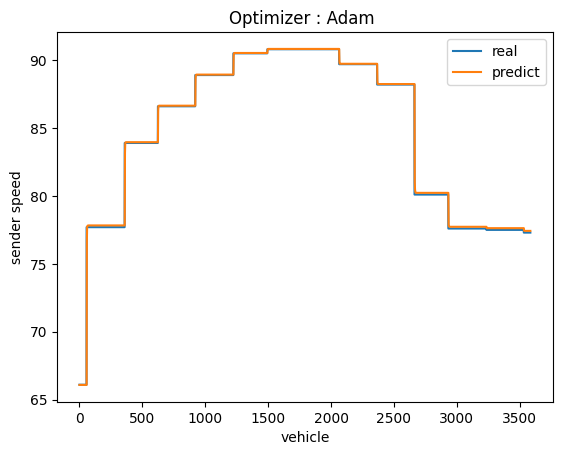

In [10]:
close_predicted=scaler.inverse_transform(test_predictions).reshape(-1,1)
def prediction_plot(close_predicted):
    fig, ax = plt.subplots()
    ax.plot(np.arange(len(close_predicted)),scaler.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
    ax.plot(np.arange(len(close_predicted)),close_predicted, label="Prediction")
    ax.legend(['real','predict'])
    plt.xlabel('vehicle')
    plt.title('Optimizer : Adam ')
    plt.ylabel('sender speed')
prediction_plot(close_predicted)

In [7]:
#SGD
from keras.optimizers import SGD
opt = SGD(learning_rate=0.001, momentum=0.9, clipvalue=5.0)

model = Sequential()
model.add(GRU(50, activation='relu', return_sequences=True,  input_shape=(seq_length, len(selected_features))))
model.add(GRU(units=50))
model.add(Dense(1))
model.compile(optimizer=opt, loss=['mean_squared_error'],metrics=metrics1)
history_sgd=model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss:}')
print(f'Test Loss: {test_loss:}')
# Make predictions
train_predictions_sgd = model.predict(X_train)
test_predictions_sgd = model.predict(X_test)

Epoch 1/20
450/450 [==============================] - 16s 24ms/step - loss: 0.0395 - mean_absolute_error: 0.1022 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1779
Epoch 2/20
450/450 [==============================] - 26s 58ms/step - loss: 0.0032 - mean_absolute_error: 0.0304 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0569
Epoch 3/20
450/450 [==============================] - 10s 22ms/step - loss: 3.3437e-04 - mean_absolute_error: 0.0099 - mean_squared_error: 3.3437e-04 - root_mean_squared_error: 0.0183
Epoch 4/20
450/450 [==============================] - 10s 22ms/step - loss: 1.8699e-04 - mean_absolute_error: 0.0052 - mean_squared_error: 1.8699e-04 - root_mean_squared_error: 0.0137
Epoch 5/20
450/450 [==============================] - 10s 22ms/step - loss: 1.8090e-04 - mean_absolute_error: 0.0048 - mean_squared_error: 1.8090e-04 - root_mean_squared_error: 0.0134
Epoch 6/20
450/450 [==============================] - 9s 19ms/step - loss: 1.7419e-04 - mean_abs

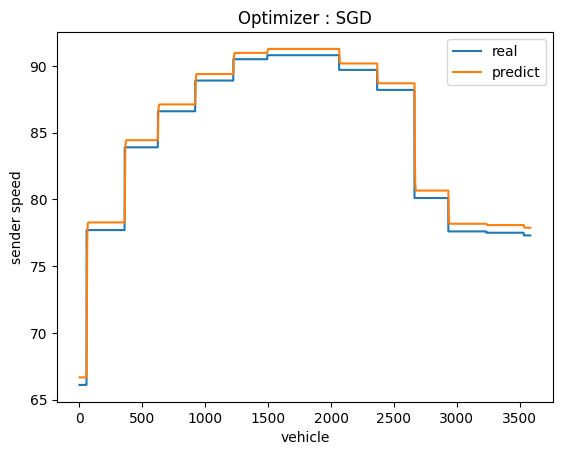

In [8]:
close_predicted=scaler.inverse_transform(test_predictions_sgd).reshape(-1,1)
def prediction_plot(close_predicted):
    fig, ax = plt.subplots()
    ax.plot(np.arange(len(close_predicted)),scaler.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
    ax.plot(np.arange(len(close_predicted)),close_predicted, label="Prediction")
    ax.legend(['real','predict'])
    plt.xlabel('vehicle')
    plt.title('Optimizer : SGD')
    plt.ylabel('sender speed')
prediction_plot(close_predicted)

In [13]:
#RMSProp
model = Sequential()
model.add(GRU(50, activation='relu', return_sequences=True,  input_shape=(seq_length, len(selected_features))))
model.add(GRU(units=50))
model.add(Dense(1))
model.compile(loss=['mean_squared_error'],optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=metrics1)
history_rmsprop=model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss:}')
print(f'Test Loss: {test_loss:}')
# Make predictions
train_predictions_rmspros = model.predict(X_train)
test_predictions_rmsprop = model.predict(X_test)

Epoch 1/20
450/450 [==============================] - 19s 28ms/step - loss: 0.0070 - mean_absolute_error: 0.0447 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0751
Epoch 2/20
450/450 [==============================] - 8s 18ms/step - loss: 0.0012 - mean_absolute_error: 0.0299 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346
Epoch 3/20
450/450 [==============================] - 9s 21ms/step - loss: 9.4869e-04 - mean_absolute_error: 0.0263 - mean_squared_error: 9.4869e-04 - root_mean_squared_error: 0.0308
Epoch 4/20
450/450 [==============================] - 9s 21ms/step - loss: 8.0435e-04 - mean_absolute_error: 0.0241 - mean_squared_error: 8.0435e-04 - root_mean_squared_error: 0.0284
Epoch 5/20
450/450 [==============================] - 9s 19ms/step - loss: 6.9919e-04 - mean_absolute_error: 0.0225 - mean_squared_error: 6.9919e-04 - root_mean_squared_error: 0.0264
Epoch 6/20
450/450 [==============================] - 9s 20ms/step - loss: 6.2336e-04 - mean_absolut

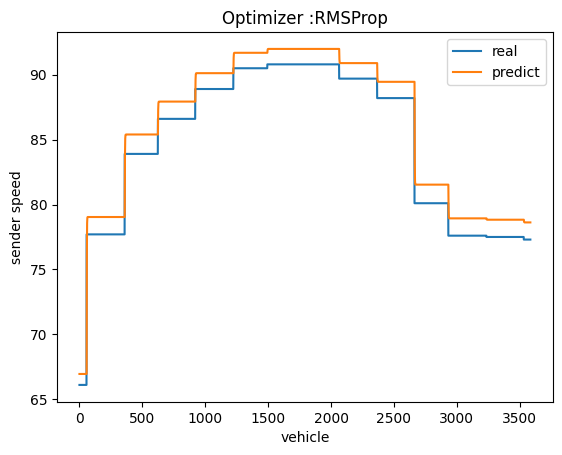

In [14]:
close_predicted=scaler.inverse_transform(test_predictions_rmsprop).reshape(-1,1)
def prediction_plot(close_predicted):
    fig, ax = plt.subplots()
    ax.plot(np.arange(len(close_predicted)),scaler.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
    ax.plot(np.arange(len(close_predicted)),close_predicted, label="Prediction")
    ax.legend(['real','predict'])
    plt.title('Optimizer :RMSProp')
    plt.xlabel('vehicle')
    plt.ylabel('sender speed')
prediction_plot(close_predicted)

In [15]:
#AdaGrad

model = Sequential()
model.add(GRU(50, activation='relu', return_sequences=True,  input_shape=(seq_length, len(selected_features))))
model.add(GRU(units=50))
model.add(Dense(1))
model.compile(loss=['mean_squared_error'],optimizer=keras.optimizers.Adagrad(learning_rate=0.001),metrics=metrics1)
history_adagrad=model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss: {train_loss:}')
print(f'Test Loss: {test_loss:}')
# Make predictions
train_predictions_adagrad = model.predict(X_train)
test_predictions_adagrad = model.predict(X_test)

Epoch 1/20
450/450 [==============================] - 13s 20ms/step - loss: 0.1201 - mean_absolute_error: 0.2474 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3102
Epoch 2/20
450/450 [==============================] - 11s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0550 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1069
Epoch 3/20
450/450 [==============================] - 10s 22ms/step - loss: 0.0091 - mean_absolute_error: 0.0492 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952
Epoch 4/20
450/450 [==============================] - 10s 22ms/step - loss: 0.0071 - mean_absolute_error: 0.0437 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0844
Epoch 5/20
450/450 [==============================] - 9s 20ms/step - loss: 0.0056 - mean_absolute_error: 0.0383 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0745
Epoch 6/20
450/450 [==============================] - 9s 20ms/step - loss: 0.0043 - mean_absolute_error: 0.0339 - mean_sq

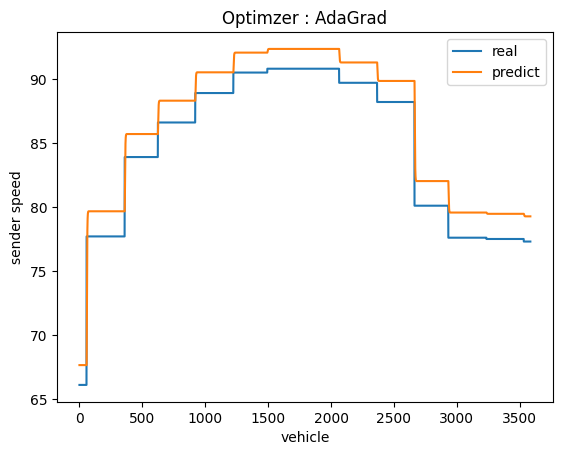

In [17]:
close_predicted=scaler.inverse_transform(test_predictions_adagrad).reshape(-1,1)
def prediction_plot(close_predicted):
    fig, ax = plt.subplots()
    ax.plot(np.arange(len(close_predicted)),scaler.inverse_transform(y_test[:, 0].reshape(-1, 1)), label="Real")
    ax.plot(np.arange(len(close_predicted)),close_predicted, label="Prediction")
    ax.legend(['real','predict'])
    plt.xlabel('vehicle')
    plt.title('Optimzer : AdaGrad')
    plt.ylabel('sender speed')
prediction_plot(close_predicted)

In [21]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 15, 50)            7950      
                                                                 
 gru_11 (GRU)                (None, 50)                15300     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23,301
Trainable params: 23,301
Non-trainable params: 0
_________________________________________________________________
